# IE 582 - SPORTS FORECASTING

  This homework focuses on analyzing sports match data to understand the efficiency of bookmakers in setting odds and explore patterns in match outcomes. The dataset includes minute-level statistics, match events, and odds provided by bookmakers for three outcomes: home win, draw, and away win. The analysis consists of three key tasks:

- Task 1 investigates the accuracy of bookmakers' odds for draw bets, comparing predicted probabilities with observed match outcomes. This includes visualizing discrepancies between implied and observed probabilities.
- Task 2 addresses potential noise caused by events like late goals or red cards, which may affect match outcomes. The analysis is refined by filtering out such instances.
- Task 3 involves building a decision tree model to predict match outcomes based on in-game statistics. The model provides insights into inefficiencies in bookmaker odds and offers interpretability for the rules governing predictions.
Through these tasks, the homework integrates data preprocessing, statistical analysis, and machine learning techniques to identify trends and inefficiencies in betting markets while evaluating the impact of in-game events on match results.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
match_data = pd.read_csv("C:/Users/ecem_/OneDrive/Masaüstü/IE 582/match_data/match_data")

In [5]:
match_data.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:30:37,2024-08-09 18:01:37,2024-08-09 18:01:37,29,0,2024-08-09 18:30:32,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1


In [6]:
match_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,6.394400e+04,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,60916.000000,60937.000000,36010.000000,36013.000000,...,61984.000000,61995.000000,62811.000000,62818.000000,61729.000000,61740.000000,63864.000000,63875.000000,40700.000000,40707.000000
mean,1.914800e+07,25.476526,27.695421,18.510137,29.482377,8.698023,2.010276,2.631209,0.812746,0.901397,...,8.411122,8.613533,8.751254,9.090722,7.766755,9.851749,0.911640,0.802630,0.011794,0.005503
std,1.345825e+04,14.496434,18.289720,64.166275,82.639170,12.092077,1.950212,2.292960,0.794087,0.826550,...,5.695672,5.720836,5.957945,6.351125,6.054359,7.351268,1.166182,1.069864,0.117546,0.073977
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,13.000000,10.000000,1.330000,1.950000,3.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,25.000000,27.000000,2.500000,4.000000,3.750000,2.000000,2.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,1.915513e+07,38.000000,44.000000,5.500000,13.000000,7.500000,3.000000,4.000000,1.000000,1.000000,...,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,1.000000,1.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,501.000000,501.000000,51.000000,12.000000,14.000000,5.000000,6.000000,...,33.000000,33.000000,34.000000,45.000000,45.000000,46.000000,9.000000,7.000000,2.000000,1.000000


In [7]:
print(match_data.shape)

(63944, 106)


## Data Preprocessing
### 1. Filter Data

In the initial stage of data preprocessing, rows where matches were marked as "suspended" or "stopped" were removed to ensure that only valid and uninterrupted matches were included in the analysis.

The dataset contained 7817 rows where the suspended column was marked as True and 4115 rows where the stopped column was marked as True. After filtering out rows where either condition was true, a cleaned dataset with 56,127 rows was obtained. Additionally, it was verified that no rows existed where matches were not suspended but marked as stopped.

This filtering was conducted to ensure the dataset reflected uninterrupted and valid match outcomes, avoiding potential inaccuracies caused by incomplete matches.

In [10]:
# Count the number of True values in the suspended column
suspended_true_count = match_data['suspended'].sum()

# Count the number of True values in the stopped column
stopped_true_count = match_data['stopped'].sum()

print(f"Number of True values in 'suspended': {suspended_true_count}")
print(f"Number of True values in 'stopped': {stopped_true_count}")

# Count rows where either suspended or stopped is True
combined_true_count = match_data[(match_data['suspended'] == True) | (match_data['stopped'] == True)].shape[0]

print(f"Number of rows where either 'suspended' or 'stopped' is True: {combined_true_count}")

Number of True values in 'suspended': 7817
Number of True values in 'stopped': 4115
Number of rows where either 'suspended' or 'stopped' is True: 7817


In [11]:
match_data[(match_data['suspended'] == False) & (match_data['stopped'] == True)].head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result


In [12]:
# Remove rows where suspended or stopped is True
match_data_filtered = match_data[(match_data['suspended'] == False) & (match_data['stopped'] == False)]

In [13]:
print(match_data_filtered.shape)

(56127, 106)


### 2. Check Missing Values

In this step, the missing values in the dataset were analyzed to understand their distribution and extent. A summary was generated, showing the count and percentage of missing data for each column. A heatmap was also created to visualize the presence of missing values across the dataset. It was observed that certain columns, such as Free Kicks - home and Free Kicks - away, had a very high percentage of missing values (over 90%), while others, like Ball Possession % - home and Ball Possession % - away, had negligible missing data (less than 0.1%). This information is useful for determining appropriate strategies to handle missing values, such as dropping columns with excessive gaps or imputing values for columns with minimal missing data.

In [16]:
# Set Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Calculate missing values and their percentages
missing_values = match_data_filtered.isnull().sum()
missing_percentage = (match_data_filtered.isnull().sum() / len(match_data_filtered)) * 100

# Combine counts and percentages into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filter for columns with missing values only
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by Missing Percentage in descending order
missing_summary = missing_summary.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print("Columns with missing values (count and percentage):")
print(missing_summary)

# Reset display options if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


Columns with missing values (count and percentage):
                                     Missing Count  Missing Percentage
Free Kicks - home                            51075           90.998984
Free Kicks - away                            51075           90.998984
Injuries - away                              41602           74.121189
Injuries - home                              41600           74.117626
Counter Attacks - away                       36836           65.629733
Counter Attacks - home                       36834           65.626169
Assists - away                               26239           46.749336
Assists - home                               26237           46.745773
Goal Attempts - away                         25309           45.092380
Goal Attempts - home                         25302           45.079908
Ball Safe - away                             21456           38.227591
Ball Safe - home                             21452           38.220464
Yellowred Cards - away   

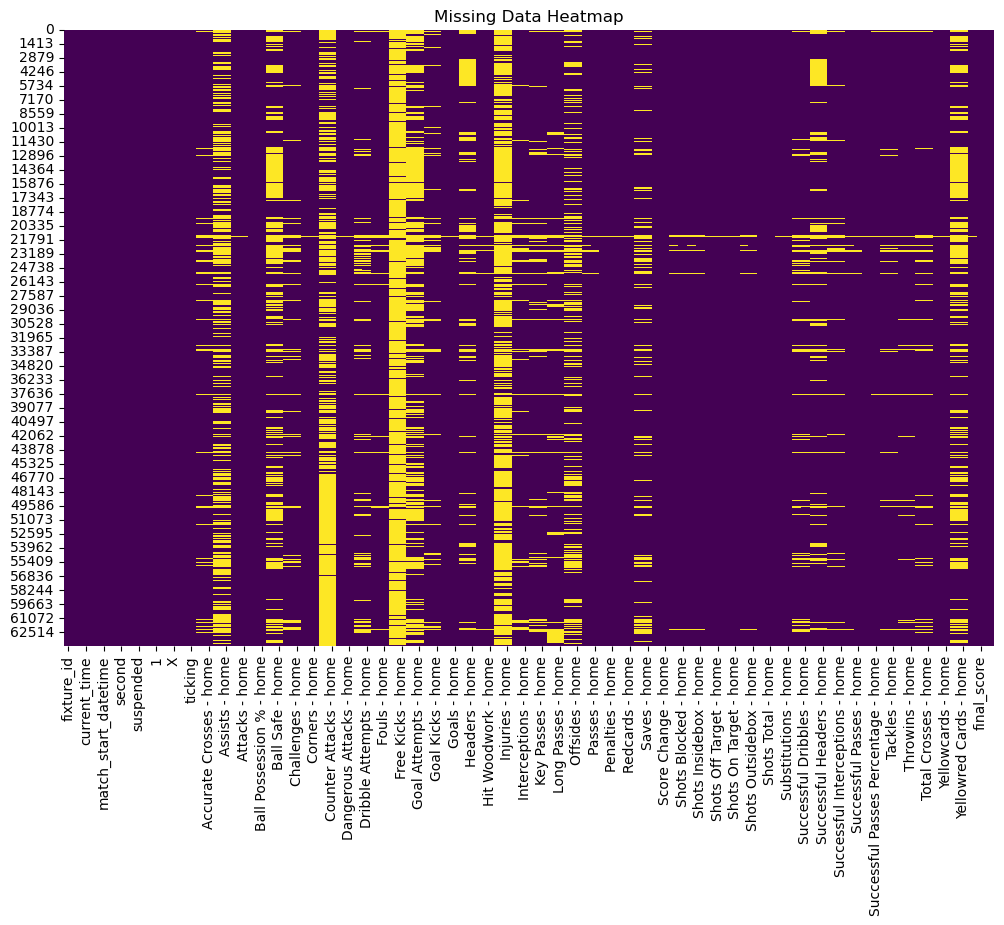

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(match_data_filtered.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In the analysis below, columns with substantial missing values, such as Injuries - home, Free Kicks - home, and Counter Attacks - home, were examined to determine whether the missing values could logically represent "zero" (e.g., no events occurred) or if they were likely due to data collection issues. Rows with missing values in these columns were compared against related features like Fouls - home, Goals - home, and Shots On Target - home. It was observed that matches with missing data still recorded significant non-zero activity in related columns, indicating that the missing values did not reflect "zero" but were likely due to incomplete recordings. Filling these values with zero would misrepresent the data and introduce bias. Since these columns also had a high percentage of missing data (e.g., Injuries - home at 74%, Free Kicks - home at 90%, and Counter Attacks - home at 65.6%), they were dropped to maintain the dataset's reliability and avoid unnecessary noise. This approach ensured a cleaner dataset for further analysis while preserving the integrity of match dynamics.

In [19]:
# Filter rows where Free Kicks - home is null
free_kicks_home_null = match_data_filtered[match_data_filtered['Free Kicks - home'].isnull()]

# Compare null rows with other related columns
related_columns = ['Free Kicks - home', 'Free Kicks - away',
                   'Goals - home', 'Goals - away', 
                   'Shots On Target - home', 'Shots On Target - away',
                   'Fouls - home', 'Fouls - away']

# Investigate rows where Free Kicks - home is null
print("Are other related stats zero when 'Free Kicks - home' is null?")
print(free_kicks_home_null[related_columns].describe())


Are other related stats zero when 'Free Kicks - home' is null?
       Free Kicks - home  Free Kicks - away  Goals - home  Goals - away  \
count                0.0                0.0  51039.000000  51037.000000   
mean                 NaN                NaN      0.650444      0.573839   
std                  NaN                NaN      0.849027      0.785989   
min                  NaN                NaN      0.000000      0.000000   
25%                  NaN                NaN      0.000000      0.000000   
50%                  NaN                NaN      0.000000      0.000000   
75%                  NaN                NaN      1.000000      1.000000   
max                  NaN                NaN      5.000000      5.000000   

       Shots On Target - home  Shots On Target - away  Fouls - home  \
count            51047.000000            51041.000000  49659.000000   
mean                 2.155680                1.735330      5.702330   
std                  2.036255                1.7

In [20]:
# Filter rows where Injuries - home is null
injuries_home_null = match_data_filtered[match_data_filtered['Injuries - home'].isnull()]

# Display related stats for rows with missing injuries
related_columns = ['Injuries - home', 'Fouls - home', 'Free Kicks - home', 'Substitutions - home', 'Goals - home']

print("Stats for rows with missing 'Injuries - home':")
print(injuries_home_null[related_columns].describe())

Stats for rows with missing 'Injuries - home':
       Injuries - home  Fouls - home  Free Kicks - home  Substitutions - home  \
count              0.0  40046.000000        3678.000000          41527.000000   
mean               NaN      4.891225           4.872485              0.690274   
std                NaN      3.675983           3.986829              1.369491   
min                NaN      0.000000           0.000000              0.000000   
25%                NaN      2.000000           2.000000              0.000000   
50%                NaN      4.000000           4.000000              0.000000   
75%                NaN      7.000000           8.000000              1.000000   
max                NaN     24.000000          17.000000              9.000000   

       Goals - home  
count  41564.000000  
mean       0.536402  
std        0.777110  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        5.000000  


In [21]:
# Filter rows where 'Counter Attacks - home' is null
counter_attacks_home_null = match_data_filtered[match_data_filtered['Counter Attacks - home'].isnull()]

# Define related columns
related_columns = ['Counter Attacks - home', 'Attacks - home', 'Dangerous Attacks - home', 'Goal Attempts - home', 'Shots On Target - home', 'Shots Off Target - home', 
    'Goals - home', 'Passes - home', 'Interceptions - home']

# Describe statistics for rows with missing Counter Attacks
print("Stats for rows with missing 'Counter Attacks - home':")
print(counter_attacks_home_null[related_columns].describe())


Stats for rows with missing 'Counter Attacks - home':
       Counter Attacks - home  Attacks - home  Dangerous Attacks - home  \
count                     0.0    36802.000000              36789.000000   
mean                      NaN       43.402641                 20.033515   
std                       NaN       31.370957                 16.846719   
min                       NaN        0.000000                  0.000000   
25%                       NaN       17.000000                  6.000000   
50%                       NaN       39.000000                 16.000000   
75%                       NaN       66.000000                 30.000000   
max                       NaN      165.000000                129.000000   

       Goal Attempts - home  Shots On Target - home  Shots Off Target - home  \
count          17927.000000            36806.000000             36806.000000   
mean               3.673286                1.849427                 2.198989   
std                2.860448   

In [22]:
# Drop columns with > 60% missing values
threshold = 0.6
columns_to_drop = match_data_filtered.columns[match_data_filtered.isnull().mean() > threshold]
match_data_filtered = match_data_filtered.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {match_data_filtered.shape[1]}")


Dropped columns: ['Counter Attacks - away', 'Counter Attacks - home', 'Free Kicks - away', 'Free Kicks - home', 'Injuries - away', 'Injuries - home']
Remaining columns: 100


To handle the rest of the missing values effectively, the dataset was analyzed, and columns were categorized into two groups based on the percentage of missing data. Moderate missing columns were defined as those with 1%-60% missing values, while low missing columns had less than 1% missing data. This categorization allowed a structured approach to address missing values, focusing on preserving data quality while minimizing loss.

For moderate missing columns, the forward-fill method was applied within each match, grouped by the fixture_id, to fill the missing values. This method was chosen because many columns represent cumulative game statistics (e.g., goals, yellow cards, or fouls). Forward-fill ensures that missing values are logically filled based on previously recorded data within the same match. If there were no prior values to fill, zeros were used as fallback values, indicating no activity before the given timestamp. This approach maintains the integrity of match-level statistics without introducing artificial or misleading imputations.

For low missing columns, rows containing missing values were dropped entirely. Since the percentage of missing values was minimal, removing these rows ensured the completeness of the dataset without significantly affecting the overall data volume or quality. Dropping these rows prevents inaccuracies that could arise from imputing low-frequency missing values.

In [24]:
# Calculate missing value percentages
missing_percentage = (match_data_filtered.isnull().mean() * 100).sort_values(ascending=False)

# Group columns by missing data percentage
moderate_missing = missing_percentage[(missing_percentage > 1) & (missing_percentage <= 60)].index
low_missing = missing_percentage[missing_percentage <= 1].index

print("Moderate missing columns (1%-60%):", list(moderate_missing))
print("Low missing columns (<1%):", list(low_missing))

Moderate missing columns (1%-60%): ['Assists - away', 'Assists - home', 'Goal Attempts - away', 'Goal Attempts - home', 'Ball Safe - away', 'Ball Safe - home', 'Yellowred Cards - away', 'Yellowred Cards - home', 'Offsides - away', 'Offsides - home', 'Saves - away', 'Saves - home', 'Successful Headers - away', 'Successful Headers - home', 'Headers - away', 'Headers - home', 'Dribble Attempts - away', 'Dribble Attempts - home', 'Key Passes - away', 'Key Passes - home', 'Long Passes - away', 'Successful Dribbles - away', 'Long Passes - home', 'Successful Dribbles - home', 'Challenges - away', 'Challenges - home', 'Goal Kicks - away', 'Goal Kicks - home', 'Interceptions - away', 'Interceptions - home', 'Accurate Crosses - away', 'Accurate Crosses - home', 'Successful Interceptions - away', 'Successful Interceptions - home', 'Total Crosses - away', 'Total Crosses - home', 'Tackles - away', 'Tackles - home', 'Fouls - away', 'Fouls - home', 'Throwins - away', 'Throwins - home']
Low missing co

In [25]:
# Function to fill NaN values within each match (grouped by fixture_id) using forward fill with fallback to 0
def fill_cumulative_columns(group):
    return group.ffill().fillna(0)  # Use .ffill() for forward fill and fallback to 0 for remaining NaNs

# Group by fixture_id and apply the function to fill missing values for moderate missing columns
for col in moderate_missing:
    match_data_filtered.loc[:, col] = match_data_filtered.groupby('fixture_id')[col].transform(fill_cumulative_columns)

print("Filled missing values for moderate missing columns with forward fill within each match, replacing initial NaNs with 0.")

# Identify rows with missing values in low missing columns
rows_with_low_missing = match_data_filtered[low_missing].isnull().any(axis=1)

# Drop rows where any low missing column has NaN
match_data_filtered = match_data_filtered[~rows_with_low_missing]

print(f"Dropped rows with missing values in low missing columns: {rows_with_low_missing.sum()}")
print(f"Remaining rows: {match_data_filtered.shape[0]}")


Filled missing values for moderate missing columns with forward fill within each match, replacing initial NaNs with 0.
Dropped rows with missing values in low missing columns: 729
Remaining rows: 55398


In [26]:
# Verify that missing values are handled
remaining_missing = match_data_filtered.isnull().sum().sum()
if remaining_missing == 0:
    print("All missing values have been successfully handled.")
else:
    print(f"Remaining missing values: {remaining_missing}")


All missing values have been successfully handled.


In [27]:
print(match_data_filtered.shape)

(55398, 100)


## TASK 1

The aim of Task 1 is to evaluate how accurately bookmakers set their odds for "draw" bets in football matches. This is done by analyzing the implied probabilities provided by the bookmakers and comparing them to the actual outcomes of the games. Implied probabilities for home wins, draws, and away wins are calculated using the formula P(x)=1/odds, followed by normalization to ensure they sum up to 1. The analysis involves discretizing the probability ranges into bins (e.g. 0.05−0.10 etc.) and calculating the observed probability of draws in each bin. By comparing these observed probabilities with the implied ones, the task aims to assess the accuracy and potential biases in the bookmakers’ odds and determine whether profitable opportunities exist by betting on draws in certain probability ranges.

In [30]:
# Extract relevant columns
odds_columns = ['1', 'X', '2']
result_columns = ['final_score', 'result']  # Assuming final_score holds the match result
filtered_data = match_data_filtered[odds_columns + result_columns].copy()

In [31]:
filtered_data

,1,X,2,final_score,result
0,1.22,6.5,10.0,2-1,1
1,1.20,6.0,13.0,2-1,1
2,1.20,6.0,13.0,2-1,1
3,1.20,6.0,13.0,2-1,1
8,1.20,6.0,15.0,2-1,1
...,...,...,...,...,...
63937,1.08,7.5,126.0,1-0,1
63938,1.05,11.0,251.0,1-0,1
63939,1.05,11.0,201.0,1-0,1
63940,1.04,13.0,351.0,1-0,1


In [32]:
# Step 1: Calculate initial probabilities
filtered_data['P_home'] = 1 / filtered_data['1']
filtered_data['P_tie'] = 1 / filtered_data['X']
filtered_data['P_away'] = 1 / filtered_data['2']

# Step 2: Normalize probabilities
filtered_data['sum_probs'] = filtered_data['P_home'] + filtered_data['P_tie'] + filtered_data['P_away']
filtered_data['P_home_norm'] = filtered_data['P_home'] / filtered_data['sum_probs']
filtered_data['P_tie_norm'] = filtered_data['P_tie'] / filtered_data['sum_probs']
filtered_data['P_away_norm'] = filtered_data['P_away'] / filtered_data['sum_probs']


In [33]:
# Calculate P(home win) - P(away win)
filtered_data['P_diff'] = filtered_data['P_home'] - filtered_data['P_away']

In [34]:
filtered_data

,1,X,2,final_score,result,P_home,P_tie,P_away,sum_probs,P_home_norm,P_tie_norm,P_away_norm,P_diff
0,1.22,6.5,10.0,2-1,1,0.819672,0.153846,0.100000,1.073518,0.763538,0.143310,0.093152,0.719672
1,1.20,6.0,13.0,2-1,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.756410
2,1.20,6.0,13.0,2-1,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.756410
3,1.20,6.0,13.0,2-1,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.756410
8,1.20,6.0,15.0,2-1,1,0.833333,0.166667,0.066667,1.066667,0.781250,0.156250,0.062500,0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63937,1.08,7.5,126.0,1-0,1,0.925926,0.133333,0.007937,1.067196,0.867625,0.124938,0.007437,0.917989
63938,1.05,11.0,251.0,1-0,1,0.952381,0.090909,0.003984,1.047274,0.909390,0.086805,0.003804,0.948397
63939,1.05,11.0,201.0,1-0,1,0.952381,0.090909,0.004975,1.048265,0.908531,0.086723,0.004746,0.947406
63940,1.04,13.0,351.0,1-0,1,0.961538,0.076923,0.002849,1.041311,0.923393,0.073871,0.002736,0.958689


First, the relevant columns related to bookmaker odds and match results were extracted from the dataset. These columns included the odds for home win, draw, and away win, along with the final score and match result. Using these odds, the implied probabilities for each outcome—home win ($P_{\text{home}}$), draw ($P_{\text{tie}}$), and away win ($P_{\text{away}}$)—were calculated using the formula:
    P(x) = 1/odds
Next, these probabilities were normalized to ensure that their sum for each match equals 1, resulting in normalized probabilities ($P_{\text{home\_norm}}$, $P_{\text{tie\_norm}}$, and $P_{\text{away\_norm}}$. This step accounted for any inconsistencies or overlaps in the initial probability calculations. A new feature, $P_{\text{diff}}$ =$P_{\text{home}}$ - $P_{\text{away}}$, as also introduced to capture the relative strength of the home team compared to the away team.

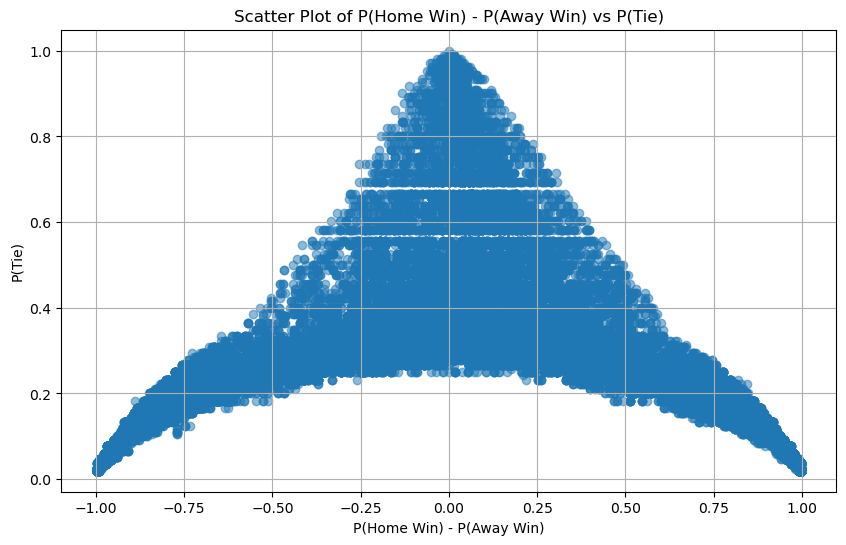

In [36]:
# Scatter plot of P(home win) - P(away win) vs P(tie)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['P_diff'], filtered_data['P_tie'], alpha=0.5)
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("P(Tie)")
plt.title("Scatter Plot of P(Home Win) - P(Away Win) vs P(Tie)")
plt.grid()
plt.show()

A scatter plot was created to visualize the relationship between $P_{\text{diff}}$ (on the x-axis) and $P_{\text{tie}}$ (on the y-axis). Each point on the plot represents a match, providing insight into how the probability of a draw varies with the difference in home and away win probabilities.
    
The data points form a triangular shape, with the highest P(Tie) values occurring near P(Home Win)−P(Away Win)=0, where home and away teams are evenly matched. This indicates that draws are most likely when there is no clear favorite.

As the difference in probabilities grows in either direction, P(Tie) decreases. This reflects that draws are less likely when one team is significantly stronger than the other. The graph also shows symmetry around P(Home Win)−P(Away Win)=0, suggesting that bookmakers adjust draw odds consistently based on the balance of team strengths.

The spread in P(Tie) values indicates variability, suggesting that bookmaker odds for draws may take additional match-specific factors into account, such as team performance or contextual influences. This variability highlights potential areas where bookmaker odds could be refined to better align with observed probabilities.

In [38]:
# Define bins for P(home win) - P(away win)
bins = np.arange(-1, 1.1, 0.2)  # Bins from -1 to 1 in steps of 0.2
filtered_data['P_diff_bin'] = pd.cut(filtered_data['P_diff'], bins)

# Identify draws (assuming 'result' column indicates "X" for draw)
filtered_data['is_draw'] = (filtered_data['result'] == 'X').astype(int)

# Group by bins and calculate total games and draw probabilities
draw_analysis = filtered_data.groupby('P_diff_bin', observed=True).agg(
    total_games=('is_draw', 'count'),
    draws=('is_draw', 'sum')
)

# Calculate observed probability of draw in each bin
draw_analysis['observed_draw_prob'] = draw_analysis['draws'] / draw_analysis['total_games']

# Compare with bookmaker P(Tie)
draw_analysis['average_P_tie'] = filtered_data.groupby('P_diff_bin', observed=True)['P_tie'].mean()

# Display the analysis table
print(draw_analysis)

                   total_games  draws  observed_draw_prob  average_P_tie
P_diff_bin                                                              
(-1.0, -0.8]              5256    524            0.099696       0.094216
(-0.8, -0.6]              3165    642            0.202844       0.215744
(-0.6, -0.4]              2859    889            0.310948       0.276605
(-0.4, -0.2]              3955   1294            0.327181       0.339827
(-0.2, -2.22e-16]         6277   2438            0.388402       0.431615
(-2.22e-16, 0.2]          9352   4363            0.466531       0.461539
(0.2, 0.4]                5795   2160            0.372735       0.365158
(0.4, 0.6]                4410   1137            0.257823       0.279611
(0.6, 0.8]                5296    978            0.184668       0.208118
(0.8, 1.0]                9033    764            0.084579       0.093943


In this analysis, the difference between the probabilities of a home win and an away win  was divided into bins, such as (-1.0, -0.8], (-0.8, -0.6], and so on. For each bin, the observed probability of a draw was calculated by dividing the number of games that ended in a draw by the total number of games in that bin. These observed probabilities were then compared with the average implied draw probabilities from the bookmakers within each bin.

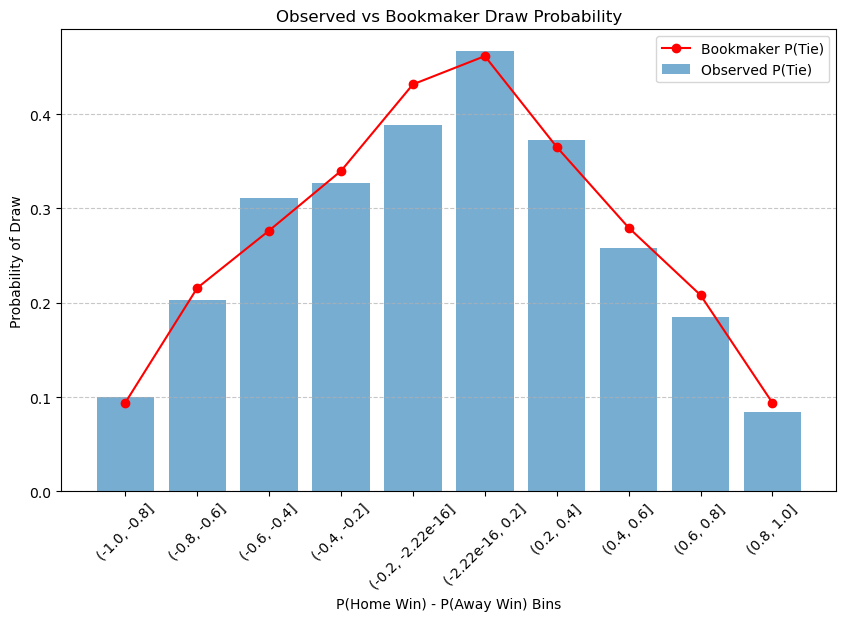

In [55]:
# Plot observed draw probabilities vs bookmaker P(Tie)
plt.figure(figsize=(10, 6))
plt.bar(draw_analysis.index.astype(str), draw_analysis['observed_draw_prob'], label='Observed P(Tie)', alpha = 0.6)
plt.plot(draw_analysis.index.astype(str), draw_analysis['average_P_tie'], label='Bookmaker P(Tie)', color='red', marker='o')
plt.xlabel("P(Home Win) - P(Away Win) Bins")
plt.ylabel("Probability of Draw")
plt.title("Observed vs Bookmaker Draw Probability")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The analysis reveals that the observed probability of draws, calculated from actual match outcomes, generally aligns well with the bookmakers' implied probabilities across most bins. However, slight discrepancies were identified, particularly in bins where P(home win)−P(away win) is close to 0. In these cases, the observed probability of draws tends to be slightly higher than the bookmaker's implied draw probability. This region corresponds to games where the teams are closely matched, making a draw more likely. The findings suggest that bookmakers may underestimate the likelihood of draws for such games, introducing a potential bias in their odds. This bias highlights opportunities for strategic betting, as consistently wagering on draws in these situations could lead to long-term profitability if the observed probabilities continue to exceed the bookmakers’ predictions.

## TASK 2

Task 2 focuses on addressing specific events during matches that could introduce noise into the analysis. These events include late goals scored after the 90th minute, which can significantly alter the match outcome, and early red cards issued within the first 15 minutes, which create a disadvantage for the affected team. Matches fitting these criteria are identified and removed to ensure that the analysis remains unbiased and focused on regular game dynamics. The objective is to assess whether removing these matches impacts the observations and results derived in Task 1.

### Condition 1: Matches with goals after the 90th minute

In [57]:
# Create a copy for Task 2
match_data_filtered_task_2 = match_data_filtered.copy()

# Sort the data by fixture_id, halftime, minute, and second
match_data_filtered_task_2 = match_data_filtered_task_2.sort_values(by=['fixture_id', 'halftime', 'minute', 'second'])

# Calculate goal changes for home and away teams
match_data_filtered_task_2['goal_change_home'] = match_data_filtered_task_2.groupby('fixture_id')['Goals - home'].diff().fillna(0)
match_data_filtered_task_2['goal_change_away'] = match_data_filtered_task_2.groupby('fixture_id')['Goals - away'].diff().fillna(0)

# Verify the new columns
print(match_data_filtered_task_2[['fixture_id', 'minute', 'halftime', 'Goals - home', 'Goals - away', 'goal_change_home', 'goal_change_away', 'final_score']].head(5))

# Identify rows where goals were scored during the last minutes
late_goal_matches = match_data_filtered_task_2[
    (match_data_filtered_task_2['halftime'] == '2nd-half') &  # Second half
    (match_data_filtered_task_2['minute'] >= 45) &            # After 90th minute
    ((match_data_filtered_task_2['goal_change_home'] > 0) | (match_data_filtered_task_2['goal_change_away'] > 0))  # Goal scored
]

# Display the result
print("Matches with goals during the last minutes:", len(late_goal_matches))
print(late_goal_matches[['fixture_id', 'halftime', 'minute', 'second', 'goal_change_home', 'goal_change_away']].head())


     fixture_id  minute  halftime  Goals - home  Goals - away  \
952  19134453.0       0  1st-half           0.0           0.0   
953  19134453.0       1  1st-half           0.0           0.0   
954  19134453.0       2  1st-half           0.0           0.0   
955  19134453.0       3  1st-half           0.0           0.0   
956  19134453.0       4  1st-half           0.0           0.0   

     goal_change_home  goal_change_away final_score  
952               0.0               0.0         1-0  
953               0.0               0.0         1-0  
954               0.0               0.0         1-0  
955               0.0               0.0         1-0  
956               0.0               0.0         1-0  
Matches with goals during the last minutes: 89
       fixture_id  halftime  minute  second  goal_change_home  \
8486   19134463.0  2nd-half      48       6               1.0   
5888   19134465.0  2nd-half      51      52               1.0   
12857  19134476.0  2nd-half      47       4

In this process, matches with goals scored after the 90th minute were identified to remove their potential influence on the analysis. A copy of the dataset was created and sorted by fixture ID, halftime, minute, and second for accurate event tracking.

To detect late goals, goal changes for both home and away teams were calculated by taking the difference between consecutive rows within each match. This step was necessary because the "Goals" columns are cumulative, and the difference reveals when a new goal was scored. Matches in the second half where goals were scored after the 90th minute were then filtered and counted. This approach helps isolate matches significantly impacted by late goals, ensuring they do not distort the overall results.

### Condition 2: Matches with red cards in the first 15 minutes

In [63]:
# Calculate red card changes
match_data_filtered_task_2['red_card_change_home'] = match_data_filtered_task_2.groupby('fixture_id')['Redcards - home'].diff().fillna(0)
match_data_filtered_task_2['red_card_change_away'] = match_data_filtered_task_2.groupby('fixture_id')['Redcards - away'].diff().fillna(0)

# Filter matches with red cards in the first 15 minutes
early_red_card_matches = match_data_filtered_task_2[
    (match_data_filtered_task_2['halftime'] == '1st-half') &  # First half
    (match_data_filtered_task_2['minute'] <= 15) &  # Time within first 15 minutes
    ((match_data_filtered_task_2['red_card_change_home'] > 0) | 
     (match_data_filtered_task_2['red_card_change_away'] > 0))  # Red card issued
]

# Count early red card matches
print("Matches with early red cards:", len(early_red_card_matches))
print(early_red_card_matches[['fixture_id', 'halftime', 'minute', 'second', 'red_card_change_home', 'red_card_change_away']].head())


Matches with early red cards: 2
       fixture_id  halftime  minute  second  red_card_change_home  \
28187  19139688.0  1st-half       6       7                   0.0   
21970  19172052.0  1st-half      13      24                   1.0   

       red_card_change_away  
28187                   1.0  
21970                   0.0  



In this part, matches where red cards were issued within the first 15 minutes were identified to assess their potential impact on the analysis. To achieve this, changes in red card counts for both home and away teams were calculated by taking the difference between consecutive rows within each match. This was necessary because also the red card columns are cumulative, and the differences indicate when new red cards were issued.

The dataset was then filtered to isolate matches in the first half where a red card was given within the first 15 minutes. These matches were counted and listed. This approach ensures that matches significantly influenced by early red cards are identified, allowing them to be excluded from further analysis to reduce noise and improve the reliability of results.

Lastly, the related matches are removed from the dataset.

In [65]:
# Combine matches to remove
matches_to_remove = pd.concat([late_goal_matches, early_red_card_matches]).drop_duplicates()

# Remove noisy matches
filtered_task2_data = match_data_filtered_task_2.drop(matches_to_remove.index)

# Count total matches removed
print("Total matches removed:", len(matches_to_remove))
print("Remaining matches:", filtered_task2_data.shape[0])


Total matches removed: 91
Remaining matches: 55307


### Reapply Task 1

In this part, the first task was reapplied after filtering out matches with late goals or early red cards to assess whether these changes affected the results. The implied probabilities for home win, draw, and away win were recalculated from the odds and normalized to ensure they summed to 1. A new feature, $P_{\text{diff}}$ was created to measure the difference between the home win and away win probabilities.

$P_{\text{diff}}$  values were then divided into bins, such as (-1.0, -0.8], and the matches within each bin were analyzed. The observed probability of draws was calculated by dividing the number of draws by the total games in each bin. These observed probabilities were compared with the average implied draw probabilities provided by bookmakers.

Finally, a bar plot was created to visualize the observed probabilities alongside the bookmakers' implied probabilities. This analysis evaluates whether removing noisy matches (e.g., matches influenced by late goals or early red cards) leads to significant differences in the alignment between observed and implied probabilities.

In [67]:
# Step 1: Calculate initial probabilities
filtered_task2_data['P_home'] = 1 / filtered_task2_data['1']
filtered_task2_data['P_tie'] = 1 / filtered_task2_data['X']
filtered_task2_data['P_away'] = 1 / filtered_task2_data['2']

# Step 2: Normalize probabilities
filtered_task2_data['sum_probs'] = filtered_task2_data['P_home'] + filtered_task2_data['P_tie'] + filtered_task2_data['P_away']
filtered_task2_data['P_home_norm'] = filtered_task2_data['P_home'] / filtered_task2_data['sum_probs']
filtered_task2_data['P_tie_norm'] = filtered_task2_data['P_tie'] / filtered_task2_data['sum_probs']
filtered_task2_data['P_away_norm'] = filtered_task2_data['P_away'] / filtered_task2_data['sum_probs']

# Recalculate probabilities
filtered_task2_data['P_diff'] = filtered_task2_data['P_home'] - filtered_task2_data['P_away']

# Display the head of specific columns
print(filtered_task2_data[['1', 'X', '2', 'final_score', 'result', 
                           'P_home', 'P_tie', 'P_away', 
                           'sum_probs', 'P_home_norm', 'P_tie_norm', 
                           'P_away_norm', 'P_diff']].head())


        1    X    2 final_score result    P_home  P_tie    P_away  sum_probs  \
952  1.66  4.0  5.0         1-0      1  0.602410   0.25  0.200000   1.052410   
953  1.66  4.0  5.0         1-0      1  0.602410   0.25  0.200000   1.052410   
954  1.61  4.0  5.5         1-0      1  0.621118   0.25  0.181818   1.052936   
955  1.61  4.0  5.0         1-0      1  0.621118   0.25  0.200000   1.071118   
956  1.61  4.0  5.0         1-0      1  0.621118   0.25  0.200000   1.071118   

     P_home_norm  P_tie_norm  P_away_norm    P_diff  
952     0.572410    0.237550     0.190040  0.402410  
953     0.572410    0.237550     0.190040  0.402410  
954     0.589891    0.237431     0.172677  0.439300  
955     0.579878    0.233401     0.186721  0.421118  
956     0.579878    0.233401     0.186721  0.421118  


In [71]:
# Define bins for P_diff
bins = np.arange(-1, 1.1, 0.2) #  Bins from -1 to 1 in steps of 0.2
filtered_task2_data['P_diff_bin'] = pd.cut(filtered_task2_data['P_diff'], bins)

# Identify draws
filtered_task2_data['is_draw'] = (filtered_task2_data['result'] == 'X').astype(int)

# Group by bins and calculate observed draw probabilities
draw_analysis_task2 = filtered_task2_data.groupby('P_diff_bin', observed=True).agg(
    total_games=('is_draw', 'count'),
    draws=('is_draw', 'sum')
)
draw_analysis_task2['observed_draw_prob'] = draw_analysis_task2['draws'] / draw_analysis_task2['total_games']

# Compare with bookmaker implied probabilities
draw_analysis_task2['average_P_tie'] = filtered_task2_data.groupby('P_diff_bin', observed=True)['P_tie'].mean()

# Display the results
print(draw_analysis_task2)

                   total_games  draws  observed_draw_prob  average_P_tie
P_diff_bin                                                              
(-1.0, -0.8]              5237    522            0.099675       0.094216
(-0.8, -0.6]              3165    642            0.202844       0.215744
(-0.6, -0.4]              2858    888            0.310707       0.276609
(-0.4, -0.2]              3954   1293            0.327011       0.339727
(-0.2, -2.22e-16]         6267   2429            0.387586       0.430851
(-2.22e-16, 0.2]          9336   4351            0.466045       0.460766
(0.2, 0.4]                5792   2160            0.372928       0.365074
(0.4, 0.6]                4410   1137            0.257823       0.279611
(0.6, 0.8]                5295    978            0.184703       0.208110
(0.8, 1.0]                8993    758            0.084288       0.094086


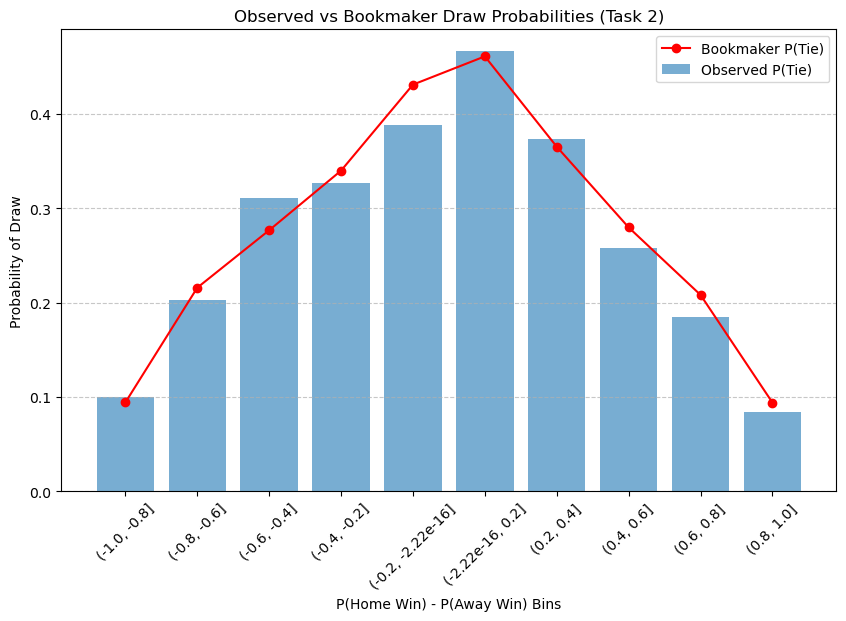

In [73]:
# Plot observed draw probabilities vs bookmaker probabilities
plt.figure(figsize=(10, 6))
plt.bar(draw_analysis_task2.index.astype(str), draw_analysis_task2['observed_draw_prob'], label='Observed P(Tie)', alpha=0.6)
plt.plot(draw_analysis_task2.index.astype(str), draw_analysis_task2['average_P_tie'], label='Bookmaker P(Tie)', color='red', marker='o')
plt.xlabel("P(Home Win) - P(Away Win) Bins")
plt.ylabel("Probability of Draw")
plt.title("Observed vs Bookmaker Draw Probabilities (Task 2)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

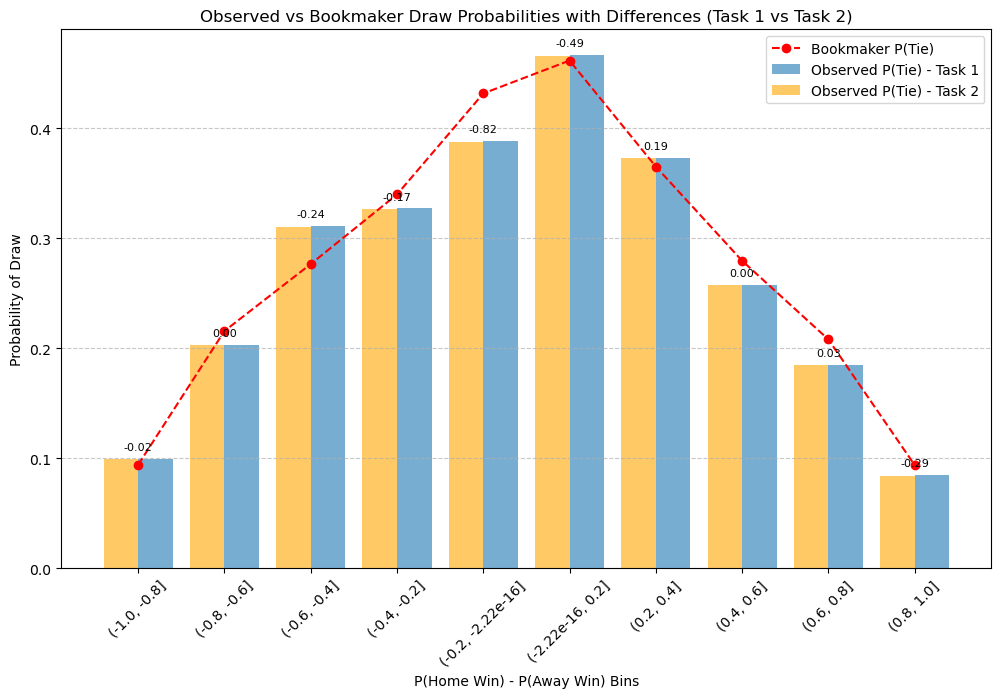

In [107]:
# Set up the plot
plt.figure(figsize=(12, 7))

# Width for side-by-side bars
bar_width = 0.4

# Generate positions for the bars
bins = np.arange(len(draw_analysis.index))  # Integer indices for bins
bins_task2 = bins - bar_width / 2  # Shift Task 2 bars to the left
bins_task1 = bins + bar_width / 2  # Shift Task 1 bars to the right

# Plot observed probabilities for Task 1
plt.bar(bins_task1, draw_analysis['observed_draw_prob'], width=bar_width, alpha=0.6, label='Observed P(Tie) - Task 1')

# Plot observed probabilities for Task 2
plt.bar(bins_task2, draw_analysis_task2['observed_draw_prob'], width=bar_width, alpha=0.6, label='Observed P(Tie) - Task 2', color='orange')

# Plot the bookmaker probabilities as a line (common for both tasks)
plt.plot(bins, draw_analysis['average_P_tie'], label='Bookmaker P(Tie)', color='red', marker='o', linestyle='--')

# Add differences as text on the plot
for i, bin_center in enumerate(bins):
    diff = (draw_analysis_task2['observed_draw_prob'].iloc[i] - draw_analysis['observed_draw_prob'].iloc[i])*1000
    plt.text(bin_center, max(draw_analysis_task2['observed_draw_prob'].iloc[i], draw_analysis['observed_draw_prob'].iloc[i]) + 0.008,
             f"{diff:.2f}", ha='center', fontsize=8, color='black')

# Add labels and formatting
plt.xlabel("P(Home Win) - P(Away Win) Bins")
plt.ylabel("Probability of Draw")
plt.title("Observed vs Bookmaker Draw Probabilities with Differences (Task 1 vs Task 2)")
plt.xticks(bins, draw_analysis.index.astype(str), rotation=45)  # Use bin labels for x-axis ticks
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


This plot compares the observed draw probabilities from Task 1 and Task 2 with the bookmaker's implied probabilities across bins of P(Home Win)−P(Away Win). The blue bars represent Task 1, the orange bars represent Task 2, and the red line shows the bookmaker's implied probabilities.

The general trend remains consistent across both tasks. The observed probabilities for both tasks closely follow the bookmaker's implied probabilities, indicating that bookmakers effectively predict the likelihood of draws. However, slight differences can be observed after removing noisy matches (late goals and early red cards). The observed probabilities for Task 2 show small decreases in most bins, suggesting that noisy matches had a minor impact on the results.

The central bins (−0.2,0.2), where teams are evenly matched, continue to show slightly higher observed probabilities than the bookmaker's implied probabilities in both tasks. This indicates that the bookmaker odds may underestimate the likelihood of draws in these situations, potentially offering opportunities for betting on draws in these cases.

It is important to note that the number of removed matches fitting the noise criteria was relatively low, so their overall impact on the analysis was limited. This explains why the changes in observed probabilities between Task 1 and Task 2 are minor, with the overall pattern remaining stable. This suggests that while noisy matches do influence outcomes, their effect was not substantial in this dataset.

## TASK 3

Task 3 involves training a decision tree model to predict the result of a match (home win, draw, or away win) based on match statistics available at each minute. Each row in the dataset represents an instance with features derived from the current state of the game. The goal is to analyze the decision tree's rules to gain insights into factors influencing match outcomes and to identify inefficiencies in bookmaker odds.

By comparing the predicted probabilities from the decision tree with the bookmakers' implied probabilities, deviations can be analyzed to detect potential inefficiencies in the market. These deviations may reveal cases where the odds do not fully account for certain game dynamics. The task is exploratory and aims to provide insights into patterns, rules, or biases that affect match outcomes, which could inform better understanding of both game behavior and market inefficiencies.

In [111]:
from sklearn.preprocessing import LabelEncoder

# Encode the result column
label_encoder = LabelEncoder()
match_data_filtered_task_3 = filtered_task2_data.copy()
match_data_filtered_task_3['result_encoded'] = label_encoder.fit_transform(match_data_filtered_task_3['result'])


The target variable, "result," was encoded into numerical values using a label encoder to prepare it for the decision tree model: Home win → 0, Draw → 1, Away win → 2. This step transforms the categorical outcomes into a format suitable for machine learning algorithms.

In [129]:
for i in match_data_filtered_task_3.columns:
    print(i)

fixture_id
halftime
current_time
half_start_datetime
match_start_datetime
minute
second
latest_bookmaker_update
suspended
stopped
1
2
X
name
ticking
Accurate Crosses - away
Accurate Crosses - home
Assists - away
Assists - home
Attacks - away
Attacks - home
Ball Possession % - away
Ball Possession % - home
Ball Safe - away
Ball Safe - home
Challenges - away
Challenges - home
Corners - away
Corners - home
Dangerous Attacks - away
Dangerous Attacks - home
Dribble Attempts - away
Dribble Attempts - home
Fouls - away
Fouls - home
Goal Attempts - away
Goal Attempts - home
Goal Kicks - away
Goal Kicks - home
Goals - away
Goals - home
Headers - away
Headers - home
Hit Woodwork - away
Hit Woodwork - home
Interceptions - away
Interceptions - home
Key Passes - away
Key Passes - home
Long Passes - away
Long Passes - home
Offsides - away
Offsides - home
Passes - away
Passes - home
Penalties - away
Penalties - home
Redcards - away
Redcards - home
Saves - away
Saves - home
Score Change - away
Score C

In [165]:
# Exclude unnecessary columns
exclude_cols = [
    'fixture_id', 'halftime', 'current_time', 'half_start_datetime', 'match_start_datetime',
    'minute', 'second', 'latest_bookmaker_update', 'suspended', 'stopped', 'name', 'ticking', 'final_score', 'result', 'P_diff_bin', 'is_draw',
    'P_home', 'P_tie', 'P_away', 'sum_probs', 'current_state'
]
target_col = 'result_encoded'
feature_cols = [col for col in match_data_filtered_task_3.columns if col not in exclude_cols + [target_col]]

# Create a subset of the dataset with selected features and the target
X = match_data_filtered_task_3[feature_cols]  # Features
y = match_data_filtered_task_3['result_encoded']  # Target


The selection of features focused on metrics that could influence match outcomes, while excluding irrelevant or redundant columns. Key features were grouped into three categories: odds-based probabilities (e.g., normalized probabilities for home win, draw, and away win), game metrics (e.g., time, goals, and red cards), and team performance metrics (e.g., shots, goal attempts, corners, and successful passes).

Unnecessary columns, such as unique identifiers as IDs and timestamps were excluded to avoid biasing the model. A subset of the dataset was created using the selected features (X) as input variables and the encoded result (y) as the target variable, preparing the data for training the decision tree model. This step ensures that the model is trained on meaningful, concise data while avoiding noise.

In [167]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


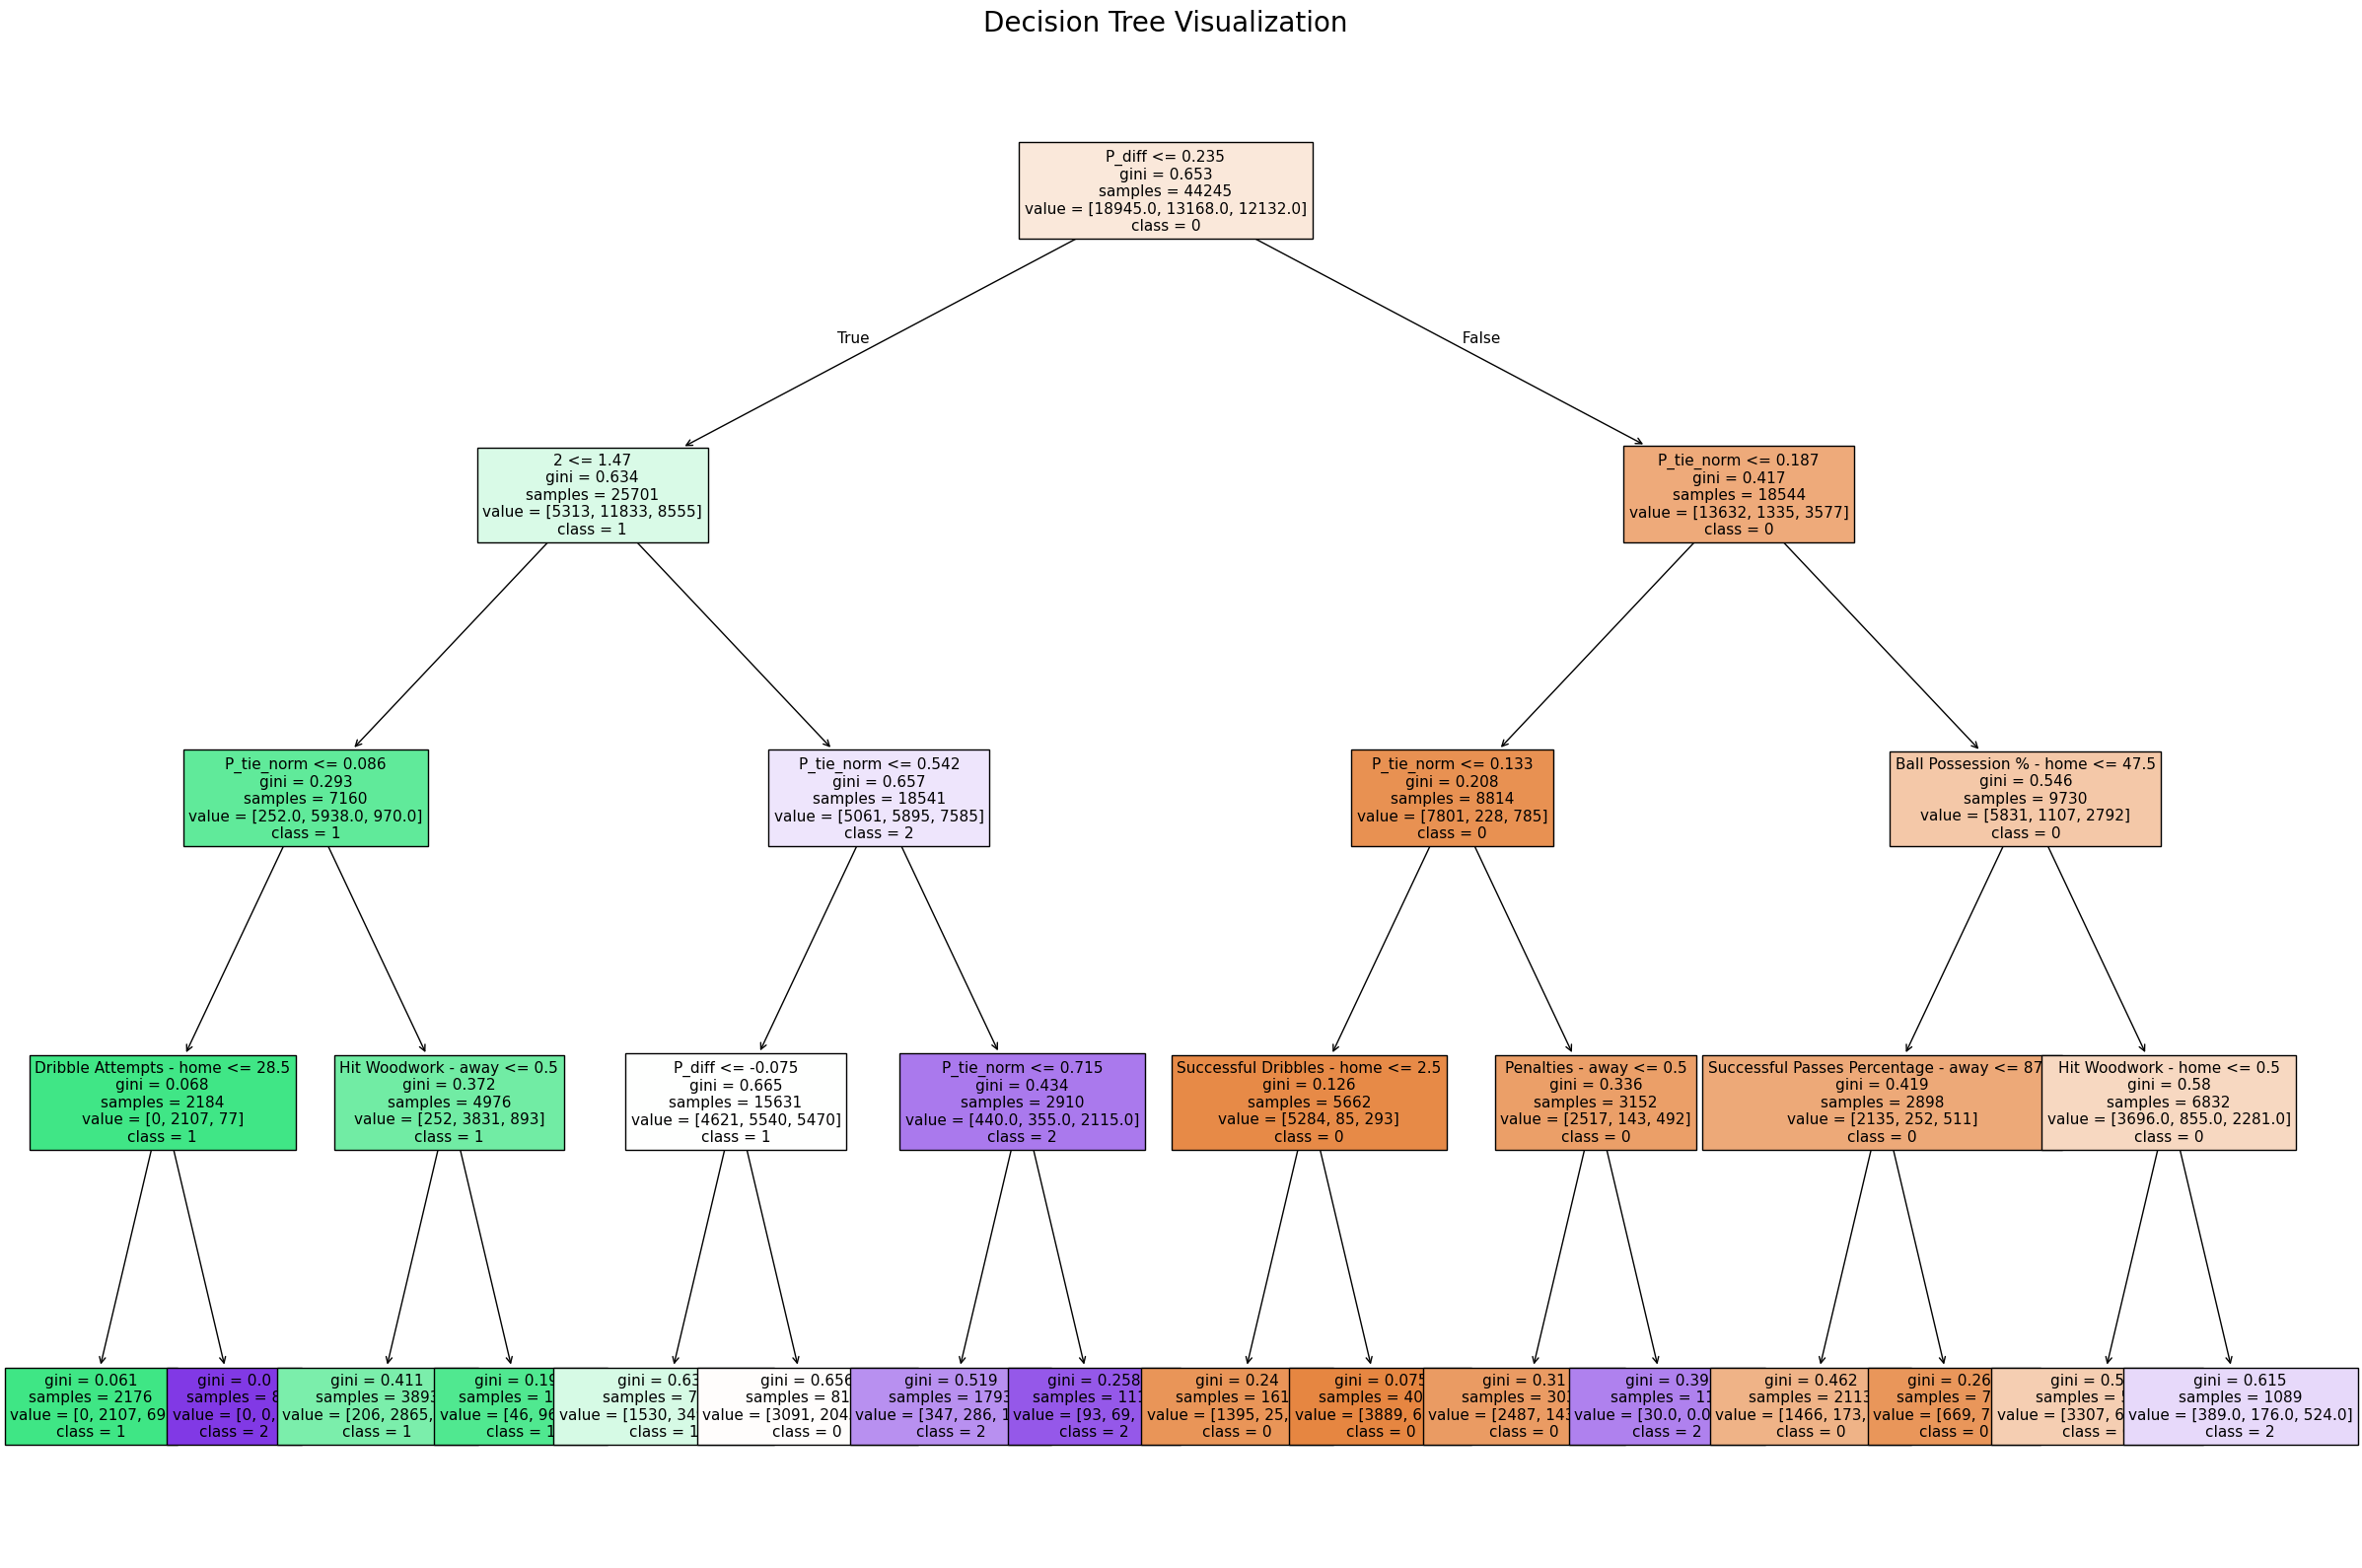

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the decision tree classifier with interpretable parameters
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=13)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(30, 20))
tree.plot_tree(decision_tree, feature_names=feature_cols, class_names=decision_tree.classes_.astype(str), filled=True,fontsize=11 )
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()


In [221]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree, feature_names=feature_cols)
print(tree_rules)


|--- P_diff <= 0.24
|   |--- 2 <= 1.47
|   |   |--- P_tie_norm <= 0.09
|   |   |   |--- Dribble Attempts - home <= 28.50
|   |   |   |   |--- class: 1
|   |   |   |--- Dribble Attempts - home >  28.50
|   |   |   |   |--- class: 2
|   |   |--- P_tie_norm >  0.09
|   |   |   |--- Hit Woodwork - away <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Hit Woodwork - away >  0.50
|   |   |   |   |--- class: 1
|   |--- 2 >  1.47
|   |   |--- P_tie_norm <= 0.54
|   |   |   |--- P_diff <= -0.07
|   |   |   |   |--- class: 1
|   |   |   |--- P_diff >  -0.07
|   |   |   |   |--- class: 0
|   |   |--- P_tie_norm >  0.54
|   |   |   |--- P_tie_norm <= 0.71
|   |   |   |   |--- class: 2
|   |   |   |--- P_tie_norm >  0.71
|   |   |   |   |--- class: 2
|--- P_diff >  0.24
|   |--- P_tie_norm <= 0.19
|   |   |--- P_tie_norm <= 0.13
|   |   |   |--- Successful Dribbles - home <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Successful Dribbles - home >  2.50
|   |   |   |   |--- class: 0
| 

In [199]:
# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                     Feature  Importance
92                    P_diff    0.579334
1                          2    0.228239
90                P_tie_norm    0.149023
10  Ball Possession % - home    0.014780
32       Hit Woodwork - home    0.008276
..                       ...         ...
29            Headers - away    0.000000
28              Goals - home    0.000000
27              Goals - away    0.000000
26         Goal Kicks - home    0.000000
46           Redcards - home    0.000000

[93 rows x 2 columns]


In [223]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.86      0.74      4849
           2       0.63      0.73      0.67      3187
           X       0.65      0.20      0.31      3026

    accuracy                           0.64     11062
   macro avg       0.64      0.60      0.57     11062
weighted avg       0.64      0.64      0.60     11062

Accuracy Score: 0.6407521243898029


The decision tree provides a visualization of the factors influencing match outcomes based on the features provided. The model uses features such as normalized probabilities (P_diff, P_tie_norm), possession percentages, and various cumulative statistics (e.g., dribble attempts, successful passes, and penalties) to predict the result of a game (home win, draw, or away win).

The first split in the tree is based on P_diff, a derived feature representing the difference between normalized probabilities for home and away wins. This split suggests that games, where this difference is below a certain threshold, have distinct outcome probabilities, highlighting the importance of the bookmaker-implied probabilities in determining game outcomes.

Further splits reveal other key features. For example, P_tie_norm, which shows the likelihood of a tie, normalized based on implied probabilities and metrics like Ball Possession % - home, Successful Dribbles - home, and Hit Woodwork - away, which highlight how game dynamics and team performance have an influence on the outcome.

At the leaf nodes, the values indicate the number of samples belonging to each class (home win, draw, away win), with the predicted class being the one with the majority. For example, leaf nodes with low P_tie_norm and low dribble attempts from the home team often result in an away win.

The tree demonstrates a strong reliance on bookmaker probabilities but also highlights in-game statistics as secondary predictors. These results suggest that while bookmaker odds provide a solid foundation for predicting outcomes, incorporating game-specific statistics adds nuanced insights, particularly in cases of balanced probabilities.

Furthermore, the classification report shows that the decision tree performs well in predicting home wins (1) and away wins (2), with good precision and recall for these classes, particularly for home wins (recall: 0.86, F1-score: 0.74). However, the model struggles with predicting draws (X), as shown by a low recall of 0.20 and an F1-score of 0.31. This indicates difficulty in identifying factors that lead to draws, likely due to their complexity or lower frequency in the data. The overall accuracy of 64% is reasonable, but improving the model's ability to predict draws could enhance its performance.


In [225]:
# Get predicted probabilities
y_pred_proba = decision_tree.predict_proba(X_test)

# Add predicted probabilities to a DataFrame
predicted_probs_df = X_test.copy()
predicted_probs_df['Predicted_Prob_Home'] = y_pred_proba[:, 0]
predicted_probs_df['Predicted_Prob_Draw'] = y_pred_proba[:, 2]  # Assuming class 'X' is index 2
predicted_probs_df['Predicted_Prob_Away'] = y_pred_proba[:, 1]

# Add bookmaker probabilities for comparison
predicted_probs_df['Bookmaker_Prob_Home'] = X_test['P_home_norm']
predicted_probs_df['Bookmaker_Prob_Draw'] = X_test['P_tie_norm']
predicted_probs_df['Bookmaker_Prob_Away'] = X_test['P_away_norm']

# Analyze the difference between predicted and bookmaker probabilities
predicted_probs_df['Diff_Home'] = predicted_probs_df['Predicted_Prob_Home'] - predicted_probs_df['Bookmaker_Prob_Home']
predicted_probs_df['Diff_Draw'] = predicted_probs_df['Predicted_Prob_Draw'] - predicted_probs_df['Bookmaker_Prob_Draw']
predicted_probs_df['Diff_Away'] = predicted_probs_df['Predicted_Prob_Away'] - predicted_probs_df['Bookmaker_Prob_Away']

# Display differences
print(predicted_probs_df[['Predicted_Prob_Draw', 'Bookmaker_Prob_Draw', 'Diff_Draw']].head(10))



       Predicted_Prob_Draw  Bookmaker_Prob_Draw  Diff_Draw
60396             0.369507             0.278059   0.091448
4867              0.134584             0.154445  -0.019861
32826             0.481175             0.495744  -0.014568
52734             0.328657             0.338687  -0.010030
12825             0.023974             0.072374  -0.048400
12353             0.031710             0.023694   0.008015
55296             0.031710             0.072374  -0.040665
13235             0.121287             0.045238   0.076050
3136              0.305938             0.263861   0.042076
24398             0.305938             0.208657   0.097280


The analysis of predicted probabilities versus bookmaker-implied probabilities reveals some interesting insights into potential inefficiencies in the bookmaker's odds. The differences between the model's predictions and the bookmaker's probabilities, particularly for draws (Diff_Draw), show both alignment and discrepancies.

Observations:
 - In some cases (e.g., Diff_Draw = -0.010030), the predicted probabilities align closely with the bookmaker's implied odds. This suggests that both the model and the bookmaker reach similar conclusions about the likelihood of a draw, indicating that the odds are fair and reflective of the game dynamics.
 - Larger discrepancies, such as Diff_Draw = 0.097280 or 0.076050, highlight instances where the model predicts a higher likelihood of a draw compared to the bookmaker. These mismatches often occur because the decision tree uses in-game statistics (like goals, red cards, and shots) to dynamically update probabilities, while bookmakers rely more heavily on static pre-match data or market-driven adjustments.

#### Potential Inefficiencies in Bookmaker Odds:

- Underestimation of Draws:
  In cases where the model predicts a significantly higher probability of a draw compared to the bookmaker (Diff_Draw > 0.05), the bookmaker may have undervalued the likelihood of balanced play. This could present opportunities for bettors to exploit undervalued odds.
- Market Adjustments:
  Bookmakers often adjust odds to manage betting patterns and liabilities, which may not always align with real-time game dynamics. For example, adjustments to account for bettor sentiment may lead to odds that deviate from the model's statistically derived probabilities.
- Overestimation of Draws:
  Negative mismatches (e.g., Diff_Draw < -0.05) suggest that bookmakers overestimate the likelihood of a draw. This could be a result of cautious odds-setting for evenly matched teams or specific scenarios like low-scoring games.

*In completing this homework, I utilized ChatGPT to assist in generating code snippets and Grammarly to check for grammatical accuracy and clarity in the report text. All outputs from these tools were carefully reviewed and modified.* 